In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import cvxpy as cvx
from scipy import stats, misc

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<font size = "6">
<b>Linear Classification</b>
</font>

Table of Contents
<div id="toc"></div>

# 1. Distance from a Line

$$\omega = \begin{bmatrix}\omega_1 \\ \omega_2\end{bmatrix}, \, x = \begin{bmatrix}x_1\\x_2\end{bmatrix} \; \implies g(x) = \omega^Tx + \omega_0 = \omega_1x_1 + \omega_2x_2 + \omega_0$$

<br>
<img src="./image_files/line_dist01.jpg", width = 500>
<br>

- If $\vec p$ and $\vec q$ are on the decision line

$$\begin{align*} g\left(\vec p\right) = g\left(\vec q\right) = 0
& \implies \omega^T \vec p + \omega_0 = \omega^T \vec q + \omega_0 = 0 \\
& \implies \omega^T \left( \vec p- \vec q \right) = 0 \\ \\
& \therefore \, \omega : \text{normal to the line (orthogonal)} 
\implies \text{tells the direction of the line}
\end{align*}$$
<br>
- If $x$ is on the line and $x = d\frac{\omega}{\lVert \omega \rVert}$ (where $d$ is a normal distance from the origin to the line)

$$ \begin{align*}  g(x)& = \omega^Tx + \omega_0 = 0 \;  \\
& \implies \omega^Td\frac{\omega}{\lVert \omega \rVert} + \omega_0 = d\frac{\omega^T\omega}{\lVert \omega \rVert} + \omega_0 = d\lVert \omega \rVert + \omega_0 = 0 \\
& \therefore d \, = - \frac{\omega_0}{\lVert \omega \rVert}
\end{align*}$$

- for any vector of $x$

$$ x = x_{\perp} + r \frac{\omega}{\lVert \omega \rVert}$$

$$ \omega^Tx = \omega^T \left( x_{\perp} + r \frac{\omega}{\lVert \omega \rVert}\right) = r \frac{\omega^T\omega}{\lVert \omega \rVert} = r \lVert \omega \rVert$$
<br>
$$ \begin{align*} g(x)
& = \omega^Tx + \omega_0 \\
& = r \lVert \omega \rVert + \omega_0 \qquad (r = d + h) \\
&  = (d +h) \lVert \omega \rVert + \omega_0 \\
& = \left(- \frac{\omega_0}{\lVert \omega \rVert} + h \right)\lVert \omega \rVert + \omega_0 \\
&  = h \lVert \omega \rVert
\end{align*}$$

$$\therefore \; h = \frac{g(x)}{\lVert \omega \rVert} \implies\; \mathbf{orthogonal \;distance \; from\; the\; line} $$

<br>
<img src="./image_files/line_dist02.jpg", width = 600>
<br>

## Another method to find a distance between $g(x) = -1$ and $g(x) = 1$

$\text{suppose }\; g(x_1) = -1,\; g(x_2) = 1$

$$ \begin{array}{I}
\omega^Tx_1+\omega_0 = -1\\
\omega^Tx_2+\omega_0 = 1\\
\end{array}
\; \implies \; \omega^T(x_2 - x_1) = 2$$

<br>
$$s = \left\langle\frac{\omega}{\lVert \omega \rVert}, x_2 - x_1 \right\rangle = \frac{1}{\lVert \omega \rVert}\omega^T(x_2 - x_1) = \frac {2}{\lVert \omega \rVert}$$


<br>
<img src="./image_files/line_dist04.jpg", width = 250>
<br>

# 2. Supervised Learning

<br>
<img src="./image_files/perceptron01.png", width=600>
<br>

# 3. Classification

- where $y$ is a discrete value
    - develop the classification algorithm to determine which class a new input should fall into


- start with binary class problems
    - Later look at multiclass classification problem, although this is just an extension of binary classification


- We could use linear regression
    - Then, threshold the classifier output (i.e. anything over some value is yes, else no)
    - linear regression with thresholding seems to work   


- We will learn
    - perceptron
    - support vector machine
    - logistic regression

# 4. Perceptron

- For input $x = \begin{bmatrix}x_1\\ \vdots\\ x_d \end{bmatrix}\;$ 'attributes of a customer' 


- weights $\omega = \begin{bmatrix}\omega_1\\ \vdots\\ \omega_d \end{bmatrix}$

$$\begin{align*} \text{Approve credit if} \;
& \sum\limits_{i=1}^{d}\omega_ix_i > \text{threshold}, \\
\text{Deny credit if} \;
& \sum\limits_{i=1}^{d}\omega_ix_i < \text{threshold}.
\end{align*}$$

<br>
$$h(x) = \text{sign} \left(\left( \sum\limits_{i=1}^{d}\omega_ix_i \right)- \text{threshold} \right) = \text{sign}\left(\left( \sum\limits_{i=1}^{d}\omega_ix_i \right)+ \omega_0\right)$$

- Introduce an artificial coordinate $x_0 = 1$:

$$h(x) = \text{sign}\left( \sum\limits_{i=0}^{d}\omega_ix_i \right)$$

- In vector form, the perceptron implements

$$h(x) = \text{sign}\left( \omega^T x \right)$$

<br>
<img src="./image_files/perceptron02.png", width=350>
<br>

- Hyperplane

    - Separates a D-dimensional space into two half-spaces
    - Defined by an outward pointing normal vector $\omega$
    - $\omega$ is orthogonal to any vector lying on the hyperplane
    - assume the hyperplane passes through origin, $\omega^T x = 0$ with $x_0 = 1$

<br>
<img src="./image_files/perceptron03.png", width=350>
<br>

## 4.1. Linear Classifier

- represent the decision boundary by a hyperplane $\omega$

- The linear classifier is a way of combining expert opinion.

- In this case, each opinion is made by a binary "expert"


- Goal: to learn the hyperplane $\omega$ using the training data
<br>
<img src="image_files/perceptron04.png", width = 500>
<br>

## 4.2. Perceptron Algorithm

The perceptron implements

$$h(x) = \text{sign}\left( \omega^Tx \right)$$

Given the training set

$$(x_1, y_1), (x_2, y_2), \cdots, (x_N, y_N) \quad \text{where } y_i \in \{-1,1\}$$

1) pick a misclassified point

$$ \text{sign}\left(\omega^Tx_n \right) \neq y_n$$

2) and update the weight vector

$$\omega \leftarrow \omega + y_nx_n$$

<br>
<img src="./image_files/perceptron05.png", width = 300>


__Why perceptron updates work ?__

- Let's look at a misclassified positive example ($y_n = +1$)

    - perceptron (wrongly) thinks $\omega_{old}^T x_n < 0$


- updates would be
$$ \begin{align*}\omega_{new} &= \omega_{old} + y_n x_n = \omega_{old} + x_n \\ \\
\omega_{new}^T x_n &= (\omega_{old} + x_n)^T x_n = \omega_{old}^T x_n + x_n^T x_n  \end{align*}$$



- Thus $\omega_{new}^T x_n$ is <font color='green'>less negative</font> than $\omega_{old}^T x_n$

## 4.3. Iterations of Perceptron

1. Randomly assign $\omega$
<br><br>
2. One iteration of the PLA (perceptron learning algorithm)
    $$\omega \leftarrow \omega + yx$$
    where $(x, y)$ is a misclassified training point
<br><br>
3. At iteration $t = 1, 2, 3, \cdots,$ pick a misclassified point from
    $$(x_1,y_1),(x_2,y_2),\cdots,(x_N, y_N)$$
<br><br>
4. and run a PLA iteration on it
<br><br>
5. That's it!

<br>
<img src="./image_files/perceptron06.png", width = 300>
<br>

## 4.4. Perceptron loss function

$$ L(\omega) = \sum_{n =1}^{m} \max \left\{ 0, -y_n \cdot \left(\omega^T x_n \right)\right\} $$

- Loss = 0 on examples where perceptron is correct, _i.e._, $y_n \cdot \left(\omega^T x_n \right) > 0$


- Loss > 0 on examples where perceptron misclassified, _i.e._, $y_n \cdot \left(\omega^T x_n \right) < 0$


<br>
__note__: $\text{sign}\left(\omega^T x_n \right) \neq y_n$ is equivalent to $ y_n \cdot \left(\omega^T x_n \right) < 0$

## 4.5. The best hyperplane separator?

- Perceptron finds one of the many possible hyperplanes separating the data if one exists


- Of the many possible choices, which one is the best?


- Utilize distance information as well


- Intuitively we want the hyperplane having the maximum margin


- Large margin leads to good generalization on the test data
    - we will see this formally when we cover Support Vector Machine

## 4.6. Matab Example

$$ 
\begin{align*}
\omega &= \begin{bmatrix} \omega_1 \\ \omega_2 \\ \omega_3\end{bmatrix}\\
x &= \begin{bmatrix} x_1^1 & x_2^1 & x_3^1& \cdots \\ x_1^2 & x_2^2 & x_3^2& \cdots \\ x_1^3 & x_2^3 & x_3^3 & \cdots \end{bmatrix} \\
y &= \begin{bmatrix} y_1 &y_2 &y_3 & \cdots\end{bmatrix}
\end{align*}$$



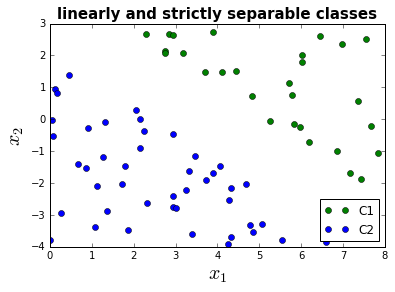

In [2]:
# perceptron

#training data gerneration

x1 = 8*np.random.rand(100, 1)
x2 = 7*np.random.rand(100, 1) - 4

g0 = 0.8*x1 + x2 - 3
g1 = g0 - 1
g2 = g0 + 1

C1 = np.where(g1 >= 0)[0]
C2 = np.where(g2 < 0)[0]

plt.plot(x1[C1], x2[C1], 'go', x1[C2], x2[C2], 'bo')
plt.xlim([0,8])
plt.title('linearly and strictly separable classes', fontweight = 'bold', fontsize = 15)
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.legend(('C1','C2'), loc = 4)
plt.show()

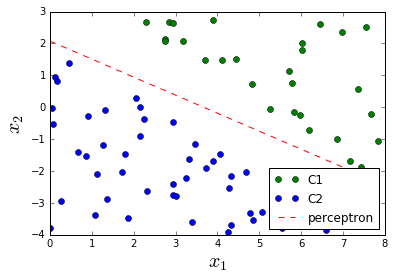

In [3]:
X1 = np.concatenate((x1[C1], x2[C1]), axis = 1).transpose()
X2 = np.concatenate((x1[C2], x2[C2]), axis = 1).transpose()


X = np.concatenate((X1, X2), axis = 1)

y1 = np.ones((1, np.shape(C1)[0]))
y2 = -np.ones((1, np.shape(C2)[0]))

y = np.concatenate((y1, y2), axis = 1)
# y shape is (1, 74)
X3 = np.concatenate((np.ones((1, np.shape(X)[1])), X), axis = 0)

#classification via perceptron algorithm

w = np.ones((1, 3)) # w initialization, shape (1, 3)
iter = np.shape(X3)[1]
for k in range(0, iter):
    for i in range(0, np.shape(X3)[1]):
        yhat = np.array(np.sign((w).dot(X3[:, i])))
        if y[0, i] != yhat:
            w = w + y[:, i]*X3[:, i]
w = np.transpose(w) 

# w shape is (3, 1)
# to drqw decision boundary
t_min = np.min(X3[1, :])
t_max = np.max(X3[1, :])
t = np.linspace(t_min, t_max, 100)
p = - w[1]/w[2]*t - w[0]/w[2]

plt.plot(x1[C1], x2[C1], 'go', x1[C2], x2[C2], 'bo', t, p, '--r')
plt.xlim([0,8])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.legend(('C1','C2', 'perceptron'), loc = 4)
plt.show()

In [5]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>